# Example of Dynamical Systems : Lotka - Volterra

see http://scipy-cookbook.readthedocs.io/ (ODE section) for more

In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize

# For those of you interested.... 
# There is a notebook backend way to render figures....

# %matplotlib notebook
# # using notebook backend to render figures
# # see here for more tips:
# # - https://stackoverflow.com/questions/41125690/matplotlib-notebook-showing-a-blank-histogram
# # - https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter




%matplotlib inline
# this line renders the images as png 
# - works well for static plots (recommended then)
# - does not work with animations (will only show last frame)

In [2]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", RuntimeWarning)
# Just to make it cleaner I do not print some of the warnings 
# Runtime Warning necessary tothe nonlinear solver


# 1 - Lotka - Volterra

In [3]:
def LotkaVolterra(state,t):
    x = state[0]
    y = state[1]
    
    alpha = 0.1
    beta =  0.1
    sigma = 0.1
    gamma = 0.1
    
    xd = x*(alpha - beta*y)
    yd = -y*(gamma - sigma*x)
    return [xd,yd]


In [4]:
t = np.arange(0,500,1)
# time vector
# range of simulation (0 ->500 with step of 0.1)

state0 = [0.5,0.5] # Initial Condition of the Simulation
system0 = odeint(LotkaVolterra,state0,t)
# We solve the system 

state1 = [1,0.5] # Another Initial Condition
system1 = odeint(LotkaVolterra,state1,t)
# We solve the system 

## Display as Time Series

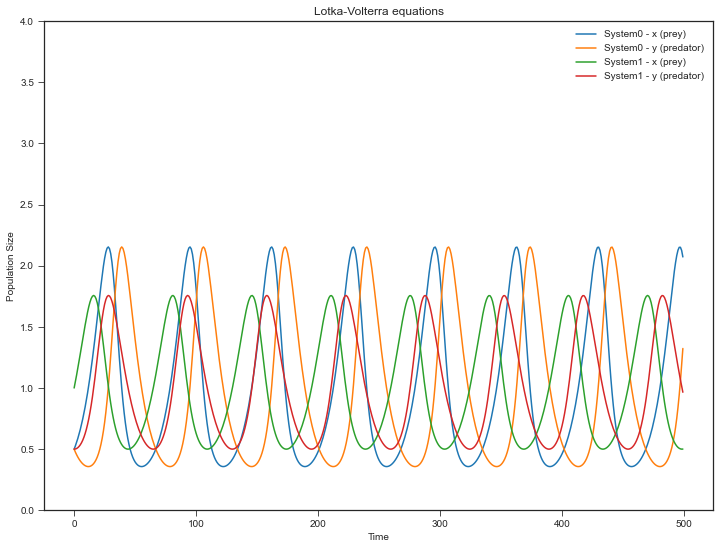

In [5]:
# Now we plot the results for both initial conditions
# LV exhibits a weird property called orbital stability (look it up)

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(t,system0)
plt.plot(t,system1)
plt.ylim([0,4])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('System0 - x (prey)','System0 - y (predator)','System1 - x (prey)','System1 - y (predator)'))
plt.title('Lotka-Volterra equations')
plt.show()

## Display in State Space
That's nice<br>
Now let's plot in the state space <br>

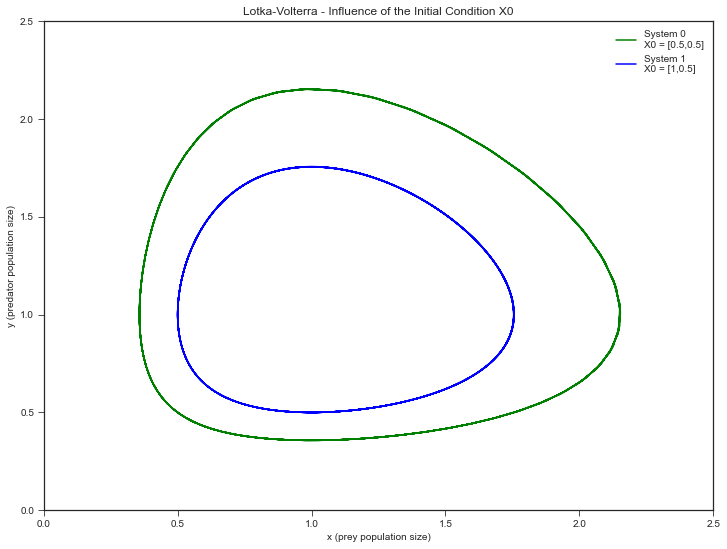

In [6]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(12,9))

plt.plot(system0[:,0],system0[:,1],'g-')
plt.plot(system1[:,0],system1[:,1],'b-')
plt.xlim([0,2.5])
plt.ylim([0,2.5])
plt.xlabel('x (prey population size)')
plt.ylabel('y (predator population size)')
plt.legend(('System 0 \nX0 = [0.5,0.5]','System 1 \nX0 = [1,0.5]'))
fig_title = u'Lotka-Volterra - Influence of the Initial Condition X0'
plt.title(fig_title)
plt.show()

# More Elaborate Displays
<br>
Here are a few nice ways to display the flow and the orbits

In [7]:
# Definition of parameters
a = 1.
b = 0.1
c = 1.5
d = 0.75

t = np.linspace(0, 15,  1000)  

def dX_dt(X, t=0):
    """ growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                     -c*X[1] + d*b*X[0]*X[1] ])


def d2X_dt2(X, t=0):
    """ Jacobian matrix evaluated in X. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
# The 2 fixed points of the dynamical system

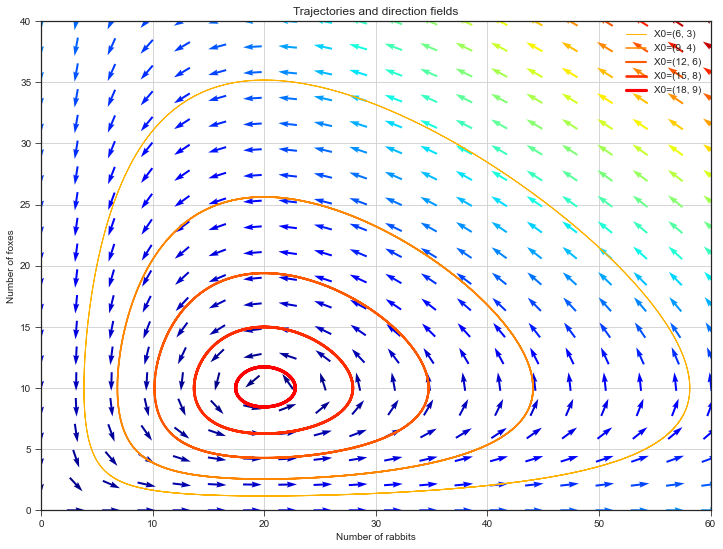

In [8]:
values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f1 = plt.figure(figsize=(12,9))

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = odeint( dX_dt, X0, t)   
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits from the plots
xmax = plt.xlim(xmin=0)[1]
ymax = 40                                        # alternative: we choose the values
xmax = 60
nb_points = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # Norm of the growth rate 
M[M == 0] = 1.                                 # Avoid zero division errors 

DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Draw direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()
#f1.savefig('rabbits_and_foxes.png')
# saving the image

## Orbital Stability 
It just so happens that there is no point integrating the ODE (for LV)
We can verify that the function IF defined below remains constant along a trajectory
NB: this is a freak property of LV

In [9]:
def IF(X):
    u, v = X #unpacking
    return u**(c/a) * v * np.exp( -(b/a)*(d*u+v) )

# IF = Integrated Function
# IF remains constant over a trajectory 


In [10]:
# We will verify (computationally) that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point 
                                                # Remember that all starting points are lined up between the two steady points
    X = odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print('For an Initial Value X0 = ({:.2f},{:.2f}) => I ~ {:.1f} |delta = {:.3g} %'.format(X0[0], X0[1], I_mean, delta))

# We can see the relative variation of IF along the orbit is negligible

For an Initial Value X0 = (6.00,3.00) => I ~ 20.8 |delta = 6.19e-05 %
For an Initial Value X0 = (9.00,4.50) => I ~ 39.4 |delta = 2.67e-05 %
For an Initial Value X0 = (12.00,6.00) => I ~ 55.7 |delta = 1.82e-05 %
For an Initial Value X0 = (15.00,7.50) => I ~ 66.8 |delta = 1.12e-05 %
For an Initial Value X0 = (18.00,9.00) => I ~ 72.4 |delta = 4.68e-06 %


### Plotting the IF Function

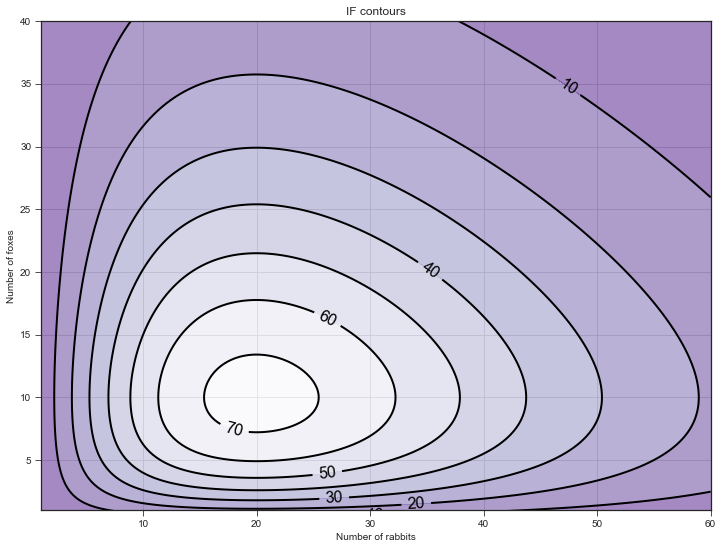

In [11]:
nb_points = 200                              # grid size
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X2 , Y2  = np.meshgrid(x, y)                   # create the grid

Z2 = IF([X2, Y2])                           # compute IF on each point
f2 = plt.figure(figsize=(12,9))
CS = plt.contourf(X2, Y2, Z2, cmap=plt.cm.Purples_r, alpha=0.5)
CS2 = plt.contour(X2, Y2, Z2, colors='black', linewidths=2. )
plt.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
plt.grid()
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.ylim(1, ymax)
plt.xlim(1, xmax)
plt.title('IF contours')

#f2.savefig('rabbits_and_foxes_2.png')
# saving the image
plt.show()